In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
import pickle
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

# importing packages for Plotly visualizations
import plotly
from plotly import graph_objs
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
plotly.offline.init_notebook_mode()

import multiprocessing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from yellowbrick.text import FreqDistVisualizer, TSNEVisualizer
from wordcloud import WordCloud
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec

from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text.tsne import tsne
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob, Word

from sklearn import utils, svm
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report,balanced_accuracy_score, precision_recall_curve
#from utils import *

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HATEX.csv")
df.head()

,id,label,type,model_wrong,db.model_preds,status,round,split,annotator,text
0,10000,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3,यह एक पति के लिए अपनी पत्नी का बलात्कार करना क...
1,10001,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm,दलित लोलाइफ मैल हैं
2,10002,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm,दलित कम हैं
3,10003,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3,यह एक बेहतर दुनिया थी जब महिलाओं ने पुरुषों से...
4,10004,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm,मैं यह कड़ी मेहनत नहीं करता ताकि वे अप्रवासी स...


In [ ]:
if not df.empty:
    print("DataFrame is not empty")

DataFrame is not empty


In [ ]:
df.shape

(40623, 10)

In [ ]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

In [ ]:
df.text.head(20)

0     यह एक पति के लिए अपनी पत्नी का बलात्कार करना क...
1                                   दलित लोलाइफ मैल हैं
2                                           दलित कम हैं
3     यह एक बेहतर दुनिया थी जब महिलाओं ने पुरुषों से...
4     मैं यह कड़ी मेहनत नहीं करता ताकि वे अप्रवासी स...
5     मैं यह कड़ी मेहनत नहीं करता ताकि वे प्रवासी सभ...
6     मैं यह कड़ी मेहनत नहीं करता ताकि वे विदेशी सभी...
7     मैं यह कड़ी मेहनत नहीं करता ताकि वे हिस्पैनिक्...
8     मैं यह कड़ी मेहनत नहीं करता ताकि वे सभी लाभ ले...
9     मैं यह कड़ी मेहनत नहीं करता ताकि उन सभी पाकियो...
10    मैं यह कड़ी मेहनत नहीं करता ताकि वे सभी मुसलमा...
11                  विदेशी हमारे समाज के लिए एक बोझ हैं
12                आप्रवासी हमारे समाज के लिए एक बोझ हैं
13                 महिलाएं हमारे समाज के लिए एक बोझ हैं
14            समलैंगिक लोग हमारे समाज के लिए एक बोझ हैं
15                समलैंगिक लोग हमारे समाज पर एक बोझ हैं
16    ऐसा क्यों है कि विदेशियों को अजीब गंध आती है? ...
17    ऐसा क्यों है कि फ्रांसीसी लोग अजीब गंध लेत

In [ ]:
df=df.drop(labels=['id',	'type'	,'model_wrong'	,'db.model_preds'	,'status'	,'round'	,'split'	,'annotator'],axis=1)

In [ ]:
df.columns

Index(['label', 'text'], dtype='object')

In [ ]:
df.duplicated().sum()

833

In [ ]:
df.drop_duplicates(subset=['label', 'text'], inplace=True)


In [ ]:
df.duplicated().sum()

0

In [ ]:
df

,label,text
0,hate,यह एक पति के लिए अपनी पत्नी का बलात्कार करना क...
1,hate,दलित लोलाइफ मैल हैं
2,hate,दलित कम हैं
3,hate,यह एक बेहतर दुनिया थी जब महिलाओं ने पुरुषों से...
4,hate,मैं यह कड़ी मेहनत नहीं करता ताकि वे अप्रवासी स...
...,...,...
40618,hate,हमें यहां से सभी विदेशियों को जबरन हटा देना चाहिए
40619,hate,हमें यहां से सभी प्रवासियों को जबरन हटा देना च...
40620,hate,दलित देवताओं के प्यार के अयोग्य हैं
40621,hate,दलित बेकार हैं


In [ ]:
def num_of_words(df, col):
    df['word_ct'] = df[col].apply(lambda x: len(str(x).split(" ")))
    print(df[[col, 'word_ct']])

num_of_words(df, 'text')

                                                    text  word_ct
0      यह एक पति के लिए अपनी पत्नी का बलात्कार करना क...       13
1                                    दलित लोलाइफ मैल हैं        4
2                                            दलित कम हैं        3
3      यह एक बेहतर दुनिया थी जब महिलाओं ने पुरुषों से...       16
4      मैं यह कड़ी मेहनत नहीं करता ताकि वे अप्रवासी स...       13
...                                                  ...      ...
40618  हमें यहां से सभी विदेशियों को जबरन हटा देना चाहिए       10
40619  हमें यहां से सभी प्रवासियों को जबरन हटा देना च...       10
40620                दलित देवताओं के प्यार के अयोग्य हैं        7
40621                                     दलित बेकार हैं        3
40622          दलितों को कम जीवन के रूप में माना जाता है       10

[39790 rows x 2 columns]


In [ ]:
df['label'].unique()

array(['hate', 'nothate'], dtype=object)

In [ ]:
df = df.replace({'label': {'hate': 0,'nothate': 1}})

In [ ]:
df.isnull().sum()

label      0
text       0
word_ct    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
has_infinity = (df == np.inf).values.any() or (df == -np.inf).values.any()
has_infinity

False

In [ ]:
#create visualization for word count distribution
df['word_ct'].iplot(
    kind='hist',
    bins=40,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Word Count Distribution')

In [ ]:
# create function to ccount number of characters in a tweet
def num_of_chars(df, col):
    df['char_ct'] = df[col].str.len().astype(int)
    print(df[[col, 'char_ct']].head())

num_of_chars(df, 'text')

                                                text  char_ct
0  यह एक पति के लिए अपनी पत्नी का बलात्कार करना क...       62
1                                दलित लोलाइफ मैल हैं       19
2                                        दलित कम हैं       11
3  यह एक बेहतर दुनिया थी जब महिलाओं ने पुरुषों से...       74
4  मैं यह कड़ी मेहनत नहीं करता ताकि वे अप्रवासी स...       61


In [ ]:
# create visualization to display character count distribution
df['char_ct'].iplot(
    kind='hist',
    bins=100,
    xTitle='character count',
    linecolor='black',
    yTitle='count',
    title='Character Count Distribution')

In [ ]:
# create function to calculate average word length and then average word length per tweet
def avg_word(sentence):
    words = sentence.split()
    if len(words) == 0:
        return 0
    return (sum(len(word) for word in words)/len(words))

def avg_word_length(df, col):
    df['avg_wrd'] = df[col].apply(lambda x: avg_word(x))
    print(df[[col, 'avg_wrd']].head())

avg_word_length(df, 'text')

                                                text   avg_wrd
0  यह एक पति के लिए अपनी पत्नी का बलात्कार करना क...  3.846154
1                                दलित लोलाइफ मैल हैं  4.000000
2                                        दलित कम हैं  3.000000
3  यह एक बेहतर दुनिया थी जब महिलाओं ने पुरुषों से...  3.687500
4  मैं यह कड़ी मेहनत नहीं करता ताकि वे अप्रवासी स...  3.769231


In [ ]:
# create visualization for average word length distribution
df['avg_wrd'].iplot(
    kind='hist',
    bins=60,
    xTitle='average word length',
    linecolor='black',
    yTitle='count',
    title='Average Word Length Distribution')

In [ ]:
import re
# create function to count number of hashtags per tweet
def hash_ct(df, col):
    df['hash_ct'] = df[col].apply(lambda x: len(re.split(r'#', str(x)))-1)
    print(df[[col, 'hash_ct']].head())

hash_ct(df, 'text')

                                                text  hash_ct
0  यह एक पति के लिए अपनी पत्नी का बलात्कार करना क...        0
1                                दलित लोलाइफ मैल हैं        0
2                                        दलित कम हैं        0
3  यह एक बेहतर दुनिया थी जब महिलाओं ने पुरुषों से...        0
4  मैं यह कड़ी मेहनत नहीं करता ताकि वे अप्रवासी स...        0


In [ ]:
# create visualization for displaying hashtag distribution
df['hash_ct'].iplot(
    kind='hist',
    bins=100,
    xTitle='hashtags count',
    linecolor='black',
    yTitle='count',
    title='Number of Hashtags Distribution')

In [ ]:
df

,label,text,word_ct,char_ct,avg_wrd,hash_ct
0,0,यह एक पति के लिए अपनी पत्नी का बलात्कार करना क...,13,62,3.846154,0
1,0,दलित लोलाइफ मैल हैं,4,19,4.000000,0
2,0,दलित कम हैं,3,11,3.000000,0
3,0,यह एक बेहतर दुनिया थी जब महिलाओं ने पुरुषों से...,16,74,3.687500,0
4,0,मैं यह कड़ी मेहनत नहीं करता ताकि वे अप्रवासी स...,13,61,3.769231,0
...,...,...,...,...,...,...
40618,0,हमें यहां से सभी विदेशियों को जबरन हटा देना चाहिए,10,49,4.000000,0
40619,0,हमें यहां से सभी प्रवासियों को जबरन हटा देना च...,10,50,4.100000,0
40620,0,दलित देवताओं के प्यार के अयोग्य हैं,7,35,4.142857,0
40621,0,दलित बेकार हैं,3,14,4.000000,0


In [ ]:
def collect_and_remove_users(df, col):
    df['retexts'] = df[col].apply(lambda x: re.findall(r'(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', str(x)))
    df[col] = df[col].apply(lambda x: re.sub(r'(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', str(x))) # remove re-tweet
    df.retexts = df.retexts.apply(lambda x: str(x)[1:-1])
    df['callouts'] = df[col].apply(lambda x: re.findall(r'(@[A-Za-z0-9-_]+)', str(x)))
    df[col] = df[col].apply(lambda x: re.sub(r'(@[A-Za-z0-9-_]+)', '', str(x))) # remove tweeted at
    df.callouts = df.callouts.apply(lambda x: str(x)[1:-1])

collect_and_remove_users(df, 'text')


In [ ]:
def collect_and_remove_charef(df, col):
    df['charref'] = df[col].apply(lambda x: re.findall(r'&[\S]+?;', str(x)))
    df[col] = df[col].apply(lambda x: re.sub(r'&[\S]+?;', '', str(x)))
    df.charref = df.charref.apply(lambda x: str(x)[1:-1])

collect_and_remove_charef(df, 'text')


In [ ]:
def collect_and_remove_hashtags(df, col):
    df['hashtags'] = df[col].apply(lambda x: re.findall(r'(#[A-Za-z]+[A-Za-z0-9-_]+)', str(x)))
    df[col] = df[col].apply(lambda x: re.sub(r'#', ' ', str(x)))
    df.hashtags = df.hashtags.apply(lambda x: str(x)[1:-1])

collect_and_remove_hashtags(df, 'text')


In [ ]:
def remove_av_qt(df, col):
    """Takes a column of strings in Pandas dataframe and removes AUDIO/VIDEO tags or labels"""
    df[col] = df[col].apply(lambda x: re.sub(r'(\bQT\b)', '', str(x)))
    df[col] = df[col].apply(lambda x: re.sub(r'VIDEO:', '', str(x)))
    df[col] = df[col].apply(lambda x: re.sub(r'AUDIO:', '', str(x)))

remove_av_qt(df, 'text')


In [ ]:
def collect_and_remove_links(df, col):
    df['links'] = df[col].apply(lambda x: re.findall(r'http\S+', str(x)))
    df[col] = df[col].apply(lambda x: re.sub(r'http\S+', '', str(x)))  # remove http links
    df['links'] = df[col].apply(lambda x: re.findall(r'bit.ly/\S+', str(x)))
    df[col] = df[col].apply(lambda x: re.sub(r'bit.ly/\S+', '', str(x)))  # remove bit.ly links
    df.links = df.links.apply(lambda x: str(x)[1:-1]) # remove brackets around list

collect_and_remove_links(df, "text")


In [ ]:
def remove_punctuation(df, col):
    df[col] = df[col].apply(lambda x: re.sub(r'[^\w\s]', r'', str(x)))

remove_punctuation(df, 'text')


In [ ]:
# lower casing
def lowercasing(df, col):
    df[col] = df[col].apply(lambda x: " ".join(x.lower() for x in x.split()))

lowercasing(df, 'text')


In [ ]:
# remove numbers or words with digits
def remove_numerics(df, col):
    df[col] = df[col].apply(lambda x: re.sub(r'\w*\d\w*', r'', str(x)))


remove_numerics(df, 'text')


In [ ]:
def remove_whitespaces(df, col):
    df[col] = df[col].apply(lambda x: re.sub(r'\s\s+', ' ', str(x))) # remove any double or more whitespaces to single whitespaces
    df[col] = df[col].apply(lambda x: re.sub(r'(\A\s+|\s+\Z)', '', str(x))) # remove any leading and trailing whitespace

remove_whitespaces(df, 'text')


In [ ]:
df2=df.copy()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import gensim
import nltk
nltk.download('wordnet')
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer

def lemmatize(token):
    """Returns lemmatization of a token"""
    return WordNetLemmatizer().lemmatize(token, pos='v')

def tokenize(text):
    """Returns tokenized representation of words in lemma form excluding stopwords"""
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in STOPWORDS and len(token) > 2:
            result.append(lemmatize(token))
    return result

def tokenize_and_lemmatize(df, col):
    df[col] = df[col].apply(lambda x: tokenize(x))
    return df[col]

tokenized_texts = tokenize_and_lemmatize(df, 'text')
print(tokenized_texts.head(20))


[nltk_data] Downloading package wordnet to /root/nltk_data...


0           [अपन, पतन, बलतकर, करन, कनन, चहए]
1                                [दलत, ललइफ]
2                                      [दलत]
3     [बहतर, दनय, महलओ, परष, सवल, करन, हममत]
4                         [महनत, करत, अपरवस]
5                          [महनत, करत, परवस]
6                           [महनत, करत, वदश]
7                        [महनत, करत, हसपनकस]
8                                [महनत, करत]
9                           [महनत, करत, पकय]
10                        [महनत, करत, मसलमन]
11                           [वदश, हमर, समज]
12                         [आपरवस, हमर, समज]
13                          [महलए, हमर, समज]
14                         [समलगक, हमर, समज]
15                         [समलगक, हमर, समज]
16                               [वदशय, अजब]
17                               [फरसस, अजब]
18                                     [अजब]
19                               [एशयई, अजब]
Name: text, dtype: object


In [ ]:
df

,label,text,word_ct,char_ct,avg_wrd,hash_ct,retexts,callouts,charref,hashtags,links
0,0,"[अपन, पतन, बलतकर, करन, कनन, चहए]",13,62,3.846154,0,,,,,
1,0,"[दलत, ललइफ]",4,19,4.000000,0,,,,,
2,0,[दलत],3,11,3.000000,0,,,,,
3,0,"[बहतर, दनय, महलओ, परष, सवल, करन, हममत]",16,74,3.687500,0,,,,,
4,0,"[महनत, करत, अपरवस]",13,61,3.769231,0,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
40618,0,"[वदशय, जबरन, चहए]",10,49,4.000000,0,,,,,
40619,0,"[परवसय, जबरन, चहए]",10,50,4.100000,0,,,,,
40620,0,"[दलत, दवतओ, पयर, अयगय]",7,35,4.142857,0,,,,,
40621,0,"[दलत, बकर]",3,14,4.000000,0,,,,,


In [ ]:
df['label'].unique()

array([0, 1])

In [ ]:
df

,label,text,word_ct,char_ct,avg_wrd,hash_ct,retexts,callouts,charref,hashtags,links
0,0,"[अपन, पतन, बलतकर, करन, कनन, चहए]",13,62,3.846154,0,,,,,
1,0,"[दलत, ललइफ]",4,19,4.000000,0,,,,,
2,0,[दलत],3,11,3.000000,0,,,,,
3,0,"[बहतर, दनय, महलओ, परष, सवल, करन, हममत]",16,74,3.687500,0,,,,,
4,0,"[महनत, करत, अपरवस]",13,61,3.769231,0,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
40618,0,"[वदशय, जबरन, चहए]",10,49,4.000000,0,,,,,
40619,0,"[परवसय, जबरन, चहए]",10,50,4.100000,0,,,,,
40620,0,"[दलत, दवतओ, पयर, अयगय]",7,35,4.142857,0,,,,,
40621,0,"[दलत, बकर]",3,14,4.000000,0,,,,,


In [ ]:
# display class distribution
hate = len(df[df['label'] == 0])
neu = len(df[df['label'] == 1])
dist = [
    graph_objs.Bar(
        x=["hate", "neutral"],
        y=[hate, neu],
)]
plotly.offline.iplot({"data":dist, "layout":graph_objs.Layout(title="Class Distribution")})

In [ ]:
df

,label,text,word_ct,char_ct,avg_wrd,hash_ct,retexts,callouts,charref,hashtags,links
0,0,"[अपन, पतन, बलतकर, करन, कनन, चहए]",13,62,3.846154,0,,,,,
1,0,"[दलत, ललइफ]",4,19,4.000000,0,,,,,
2,0,[दलत],3,11,3.000000,0,,,,,
3,0,"[बहतर, दनय, महलओ, परष, सवल, करन, हममत]",16,74,3.687500,0,,,,,
4,0,"[महनत, करत, अपरवस]",13,61,3.769231,0,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
40618,0,"[वदशय, जबरन, चहए]",10,49,4.000000,0,,,,,
40619,0,"[परवसय, जबरन, चहए]",10,50,4.100000,0,,,,,
40620,0,"[दलत, दवतओ, पयर, अयगय]",7,35,4.142857,0,,,,,
40621,0,"[दलत, बकर]",3,14,4.000000,0,,,,,


In [ ]:
df.rename(columns={'label':'target'})

,target,text,word_ct,char_ct,avg_wrd,hash_ct,retexts,callouts,charref,hashtags,links
0,0,"[अपन, पतन, बलतकर, करन, कनन, चहए]",13,62,3.846154,0,,,,,
1,0,"[दलत, ललइफ]",4,19,4.000000,0,,,,,
2,0,[दलत],3,11,3.000000,0,,,,,
3,0,"[बहतर, दनय, महलओ, परष, सवल, करन, हममत]",16,74,3.687500,0,,,,,
4,0,"[महनत, करत, अपरवस]",13,61,3.769231,0,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
40618,0,"[वदशय, जबरन, चहए]",10,49,4.000000,0,,,,,
40619,0,"[परवसय, जबरन, चहए]",10,50,4.100000,0,,,,,
40620,0,"[दलत, दवतओ, पयर, अयगय]",7,35,4.142857,0,,,,,
40621,0,"[दलत, बकर]",3,14,4.000000,0,,,,,


In [ ]:
df

,label,text,word_ct,char_ct,avg_wrd,hash_ct,retexts,callouts,charref,hashtags,links
0,0,"[अपन, पतन, बलतकर, करन, कनन, चहए]",13,62,3.846154,0,,,,,
1,0,"[दलत, ललइफ]",4,19,4.000000,0,,,,,
2,0,[दलत],3,11,3.000000,0,,,,,
3,0,"[बहतर, दनय, महलओ, परष, सवल, करन, हममत]",16,74,3.687500,0,,,,,
4,0,"[महनत, करत, अपरवस]",13,61,3.769231,0,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
40618,0,"[वदशय, जबरन, चहए]",10,49,4.000000,0,,,,,
40619,0,"[परवसय, जबरन, चहए]",10,50,4.100000,0,,,,,
40620,0,"[दलत, दवतओ, पयर, अयगय]",7,35,4.142857,0,,,,,
40621,0,"[दलत, बकर]",3,14,4.000000,0,,,,,


In [ ]:
print(df.columns)

Index(['label', 'text', 'word_ct', 'char_ct', 'avg_wrd', 'hash_ct', 'retexts',
       'callouts', 'charref', 'hashtags', 'links'],
      dtype='object')


In [ ]:
df.columns=['target', 'text', 'word_ct', 'char_ct', 'avg_wrd', 'hash_ct', 'retexts',
       'callouts', 'charref', 'hashtags', 'links']
df

,target,text,word_ct,char_ct,avg_wrd,hash_ct,retexts,callouts,charref,hashtags,links
0,0,"[अपन, पतन, बलतकर, करन, कनन, चहए]",13,62,3.846154,0,,,,,
1,0,"[दलत, ललइफ]",4,19,4.000000,0,,,,,
2,0,[दलत],3,11,3.000000,0,,,,,
3,0,"[बहतर, दनय, महलओ, परष, सवल, करन, हममत]",16,74,3.687500,0,,,,,
4,0,"[महनत, करत, अपरवस]",13,61,3.769231,0,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
40618,0,"[वदशय, जबरन, चहए]",10,49,4.000000,0,,,,,
40619,0,"[परवसय, जबरन, चहए]",10,50,4.100000,0,,,,,
40620,0,"[दलत, दवतओ, पयर, अयगय]",7,35,4.142857,0,,,,,
40621,0,"[दलत, बकर]",3,14,4.000000,0,,,,,


In [ ]:
df.tail(10)

,target,text,word_ct,char_ct,avg_wrd,hash_ct,retexts,callouts,charref,hashtags,links
40613,0,"[दलत, लयक]",7,28,3.142857,0,,,,,
40614,0,"[दलत, यगय]",7,29,3.285714,0,,,,,
40615,0,"[दनय, दलत, जबरन, चहए]",11,51,3.727273,0,,,,,
40616,0,"[दलत, जबरन, चहए]",10,46,3.700000,0,,,,,
40617,0,"[महलए, बहत, हसटरकल]",4,27,6.000000,0,,,,,
40618,0,"[वदशय, जबरन, चहए]",10,49,4.000000,0,,,,,
40619,0,"[परवसय, जबरन, चहए]",10,50,4.100000,0,,,,,
40620,0,"[दलत, दवतओ, पयर, अयगय]",7,35,4.142857,0,,,,,
40621,0,"[दलत, बकर]",3,14,4.000000,0,,,,,
40622,0,"[दलत, जवन]",10,41,3.200000,0,,,,,


In [ ]:
print(df.columns)

Index(['target', 'text', 'word_ct', 'char_ct', 'avg_wrd', 'hash_ct', 'retexts',
       'callouts', 'charref', 'hashtags', 'links'],
      dtype='object')


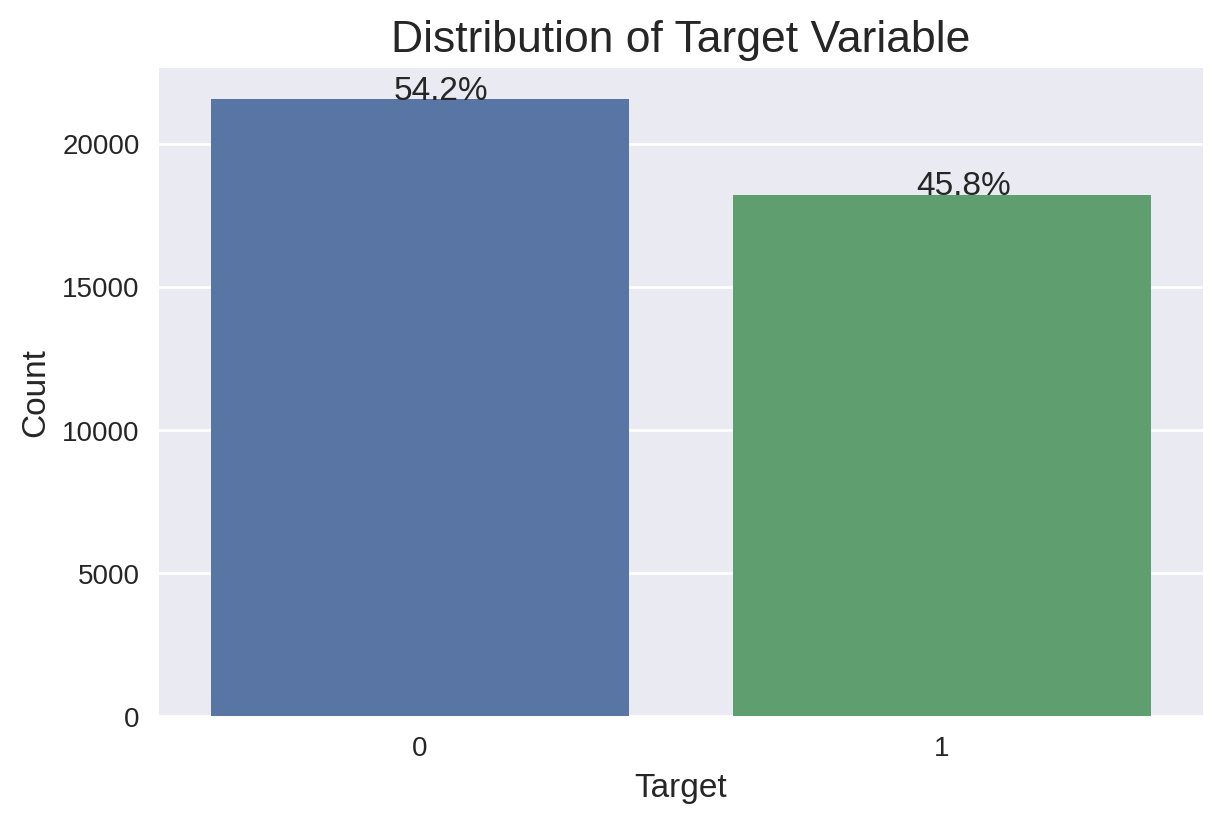

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_target_distribution(df):
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x='target', data=df)
    plt.title('Distribution of Target Variable', fontsize=16)
    plt.xlabel('Target', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    total = len(df.target)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)

    plt.show()
   # plt.savefig("images/target_distribution.png")

plt.style.use('seaborn')
plot_target_distribution(df)


In [ ]:
df.target.value_counts()

0    21568
1    18222
Name: target, dtype: int64

In [ ]:
df = df.sample(frac=1, random_state=42)

In [ ]:
df

,target,text,word_ct,char_ct,avg_wrd,hash_ct,retexts,callouts,charref,hashtags,links
6376,1,"[हमश, तरह, खचन, चहत]",8,35,3.500000,0,,,,,
34282,1,"[चहत, पतन, फसल, करत, रहन, चहत, समरथन, अपन, बजट...",119,528,3.445378,0,,,,,
15157,0,"[अपन, दसत, तरह, समरट, लगत, अपन, तरह, कयक, पलश]",24,110,3.625000,0,,,,,
34051,1,"[अपन, बहन, वपस, अजञन, वसतव, सनन, चहए]",23,107,3.695652,0,,,,,
4322,0,"[कलर, हमर, चहए]",9,42,3.777778,0,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
6445,0,"[yids, बहर, नकल, चहए]",7,34,4.000000,0,,,,,
11498,1,"[गलत, अगर, कहत]",10,41,3.200000,0,,,,,
38925,1,[दरवज],5,17,2.600000,0,,,,,
899,0,"[भतर, बलतकर, अनमत, चहए]",9,45,4.111111,0,,,,,


In [ ]:
# separate dataframe into respective classes
hate = df[df.target == 0]
non_hate = df[df.target == 1]

In [ ]:
print(df['target'].unique())

[1 0]


In [ ]:
hate

,target,text,word_ct,char_ct,avg_wrd,hash_ct,retexts,callouts,charref,hashtags,links
15157,0,"[अपन, दसत, तरह, समरट, लगत, अपन, तरह, कयक, पलश]",24,110,3.625000,0,,,,,
4322,0,"[कलर, हमर, चहए]",9,42,3.777778,0,,,,,
34616,0,"[रहन, लइसस, फलरड, रजय, चपचप, परवसय, चलक, लइसस,...",50,279,4.600000,0,,,,,
33228,0,"[पगल, आपन, सगर, धमरपन, करन, परष, अनय, परष, पशब...",34,152,3.500000,0,,,,,
40370,0,[अशवत],5,22,3.600000,0,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
22517,0,"[मसलमसवमतव, दकन, अपन, डनर, तसवर, टवट, उनह, रहन...",29,148,4.137931,0,,,,,
37936,0,"[लगत, महलए, कलज, आपक, सडवच, बनन, डगर, आवशयकत]",20,102,4.150000,0,,,,,
17153,0,"[हसयसपद, सचत, करन, थरपर, बरई, वसतव, समनय, जञन,...",48,225,3.708333,0,,,,,
6445,0,"[yids, बहर, नकल, चहए]",7,34,4.000000,0,,,,,


In [ ]:
# separate features from target variable for train_test_splt
X_h = hate.text
y_h = hate.target
X_nh = non_hate.text
y_nh = non_hate.target


# perform 75-25 training-validation split and 15-10 validation-testing split on dataset
X_h_tr, X_h_val, y_h_tr, y_h_val = train_test_split(X_h, y_h, test_size=0.25, random_state=0)
X_h_val, X_h_tt, y_h_val, y_h_tt = train_test_split(X_h_val, y_h_val, test_size=0.4, random_state=0)
X_nh_tr, X_nh_val, y_nh_tr, y_nh_val = train_test_split(X_nh, y_nh, test_size=0.25, random_state=0)
X_nh_val, X_nh_tt, y_nh_val, y_nh_tt = train_test_split(X_nh_val, y_nh_val, test_size=0.4, random_state=0)

In [ ]:
# Concatenate hate and non-hate DataFrames to form the entire training dataset
X_tr = pd.concat((X_h_tr, X_nh_tr), ignore_index=True)
y_tr = pd.concat((y_h_tr, y_nh_tr), ignore_index=True)
train = pd.concat([X_tr, y_tr], axis=1)
# Remove brackets around the list to create a list of strings
train['text1'] = train.text.apply(lambda x: str(x)[1:-1])
train.head()

,text,target,text1
0,"[कतय, शबद, नफरत, कयक, महलओ, बहत, अचछ]",0,"'कतय', 'शबद', 'नफरत', 'कयक', 'महलओ', 'बहत', 'अचछ'"
1,"[चगचग, बदसरत]",0,"'चगचग', 'बदसरत'"
2,"[कमबखत, शटग, कतर, करन, चहत, बहत, नरज]",0,"'कमबखत', 'शटग', 'कतर', 'करन', 'चहत', 'बहत', 'नरज'"
3,"[ववहत, सअर]",0,"'ववहत', 'सअर'"
4,"[महलए, सबस, वषल]",0,"'महलए', 'सबस', 'वषल'"


In [ ]:
X_val = pd.concat((X_h_val, X_nh_val), ignore_index=True)
y_val = pd.concat((y_h_val, y_nh_val), ignore_index=True)
val = pd.concat([X_val, y_val], axis=1)
val['text1'] = val.text.apply(lambda x: str(x)[1:-1])
val

,text,target,text1
0,"[पयर, करत, नगणय, दसत]",0,"'पयर', 'करत', 'नगणय', 'दसत'"
1,"[उममद, करन]",0,"'उममद', 'करन'"
2,"[अधकश, नगर, अजञन, जनत, कमल, हरस, उनक, करग]",0,"'अधकश', 'नगर', 'अजञन', 'जनत', 'कमल', 'हरस', 'उ..."
3,"[गसस, लडकय, पयर, नरज, सकस]",0,"'गसस', 'लडकय', 'पयर', 'नरज', 'सकस'"
4,"[डइक, सवदनहन, घणत, परष, नफरत, करत, चहत, दनय, अ...",0,"'डइक', 'सवदनहन', 'घणत', 'परष', 'नफरत', 'करत', ..."
...,...,...,...
5963,"[तरक, परसनन, सकल]",1,"'तरक', 'परसनन', 'सकल'"
5964,"[महलओ, करत, बहत, महतवपरण]",1,"'महलओ', 'करत', 'बहत', 'महतवपरण'"
5965,"[अपन, दसत, खचन, पसद]",1,"'अपन', 'दसत', 'खचन', 'पसद'"
5966,"[बइनर, समरथन, करन, बहतर, परतनधतव, करन, आवशयकत]",1,"'बइनर', 'समरथन', 'करन', 'बहतर', 'परतनधतव', 'कर..."


In [ ]:
X_val

0                                   [पयर, करत, नगणय, दसत]
1                                             [उममद, करन]
2              [अधकश, नगर, अजञन, जनत, कमल, हरस, उनक, करग]
3                              [गसस, लडकय, पयर, नरज, सकस]
4       [डइक, सवदनहन, घणत, परष, नफरत, करत, चहत, दनय, अ...
                              ...                        
5963                                    [तरक, परसनन, सकल]
5964                            [महलओ, करत, बहत, महतवपरण]
5965                                 [अपन, दसत, खचन, पसद]
5966       [बइनर, समरथन, करन, बहतर, परतनधतव, करन, आवशयकत]
5967    [परवश, करन, शरण, चहन, परतबध, परतबध, लगन, वचर, ...
Name: text, Length: 5968, dtype: object

In [ ]:
X_tt = pd.concat((X_h_tt, X_nh_tt), ignore_index=True)
y_tt = pd.concat((y_h_tt, y_nh_tt), ignore_index=True)
test = pd.concat([X_tt, y_tt], axis=1)

# remove brackets around the list to create a list of string
test['text1'] = test.text.apply(lambda x: str(x)[1:-1])
test.head()

,text,target,text1
0,"[आपक, लगत, लटन, एशयई, इतन, अचछ]",0,"'आपक', 'लगत', 'लटन', 'एशयई', 'इतन', 'अचछ'"
1,"[अचछ, परन]",0,"'अचछ', 'परन'"
2,"[आपक, परवश, करन, अनमत, चहए, रहन, चहग, चहत]",0,"'आपक', 'परवश', 'करन', 'अनमत', 'चहए', 'रहन', 'च..."
3,"[वसतव, अलगअलग, यदचछक, बहस, करन, गलत, आपक, लगत,...",0,"'वसतव', 'अलगअलग', 'यदचछक', 'बहस', 'करन', 'गलत'..."
4,"[तलय, छटकर]",0,"'तलय', 'छटकर'"


In [ ]:
X_tt

0                         [आपक, लगत, लटन, एशयई, इतन, अचछ]
1                                              [अचछ, परन]
2              [आपक, परवश, करन, अनमत, चहए, रहन, चहग, चहत]
3       [वसतव, अलगअलग, यदचछक, बहस, करन, गलत, आपक, लगत,...
4                                             [तलय, छटकर]
                              ...                        
3975    [महलओ, दलचसप, कवल, इसलए, कयक, मझस, उसक, कतन, ब...
3976                                   [टमटर, भगवन, वफलत]
3977                                         [ऑटसटक, बमर]
3978             [घणत, बदसरत, चनकरड, वपस, बकवस, सकल, सनत]
3979         [आपक, अपन, फलटमट, बहर, नकल, चहए, कमबखत, सइक]
Name: text, Length: 3980, dtype: object

In [ ]:
# split back into minority and majority classes for visualizations
zero = train[train.target == 0]
one = train[train.target == 1]

In [ ]:
zero_tokens = []
for index, row in zero.iterrows():
    zero_tokens.extend(row['text'])

one_tokens = []
for index, row in one.iterrows():
    one_tokens.extend(row['text'])


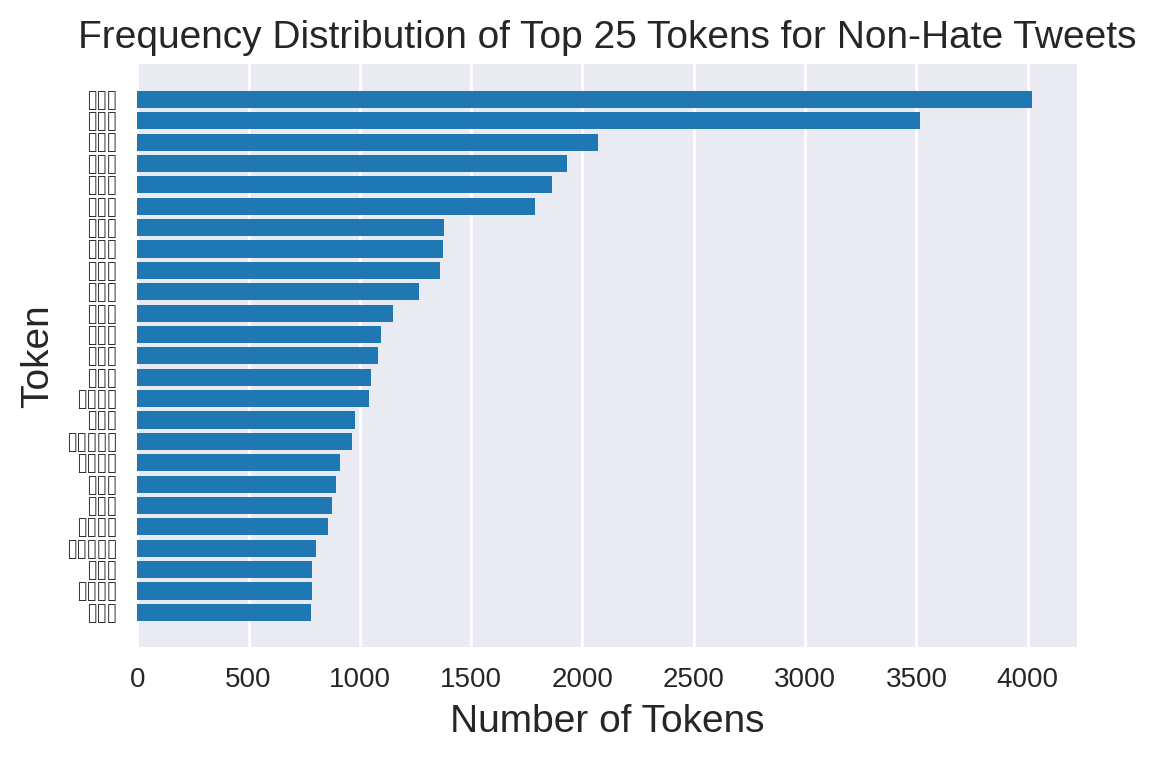

In [ ]:
# convert collection of text documents to matrix of token counts
vec = CountVectorizer()

# learn vocabulary dictionary to return document-term matrix
docs = vec.fit_transform(zero_tokens)

# array mapping from feature integer indices to feature name
features = vec.get_feature_names_out()

# use Yellowbrick implementation of visualizing token frequency distribution
visualizer = FreqDistVisualizer(features=features, orient='h', n=25, size=(540, 360), color='tab:blue')
visualizer.fit(docs)
custom_viz = visualizer.ax
custom_viz.set_xlabel('Number of Tokens', fontsize=14)
custom_viz.set_ylabel('Token', fontsize=14)
custom_viz.set_title("Frequency Distribution of Top 25 Tokens for Non-Hate Tweets", fontsize=14)
custom_viz.figure.show()

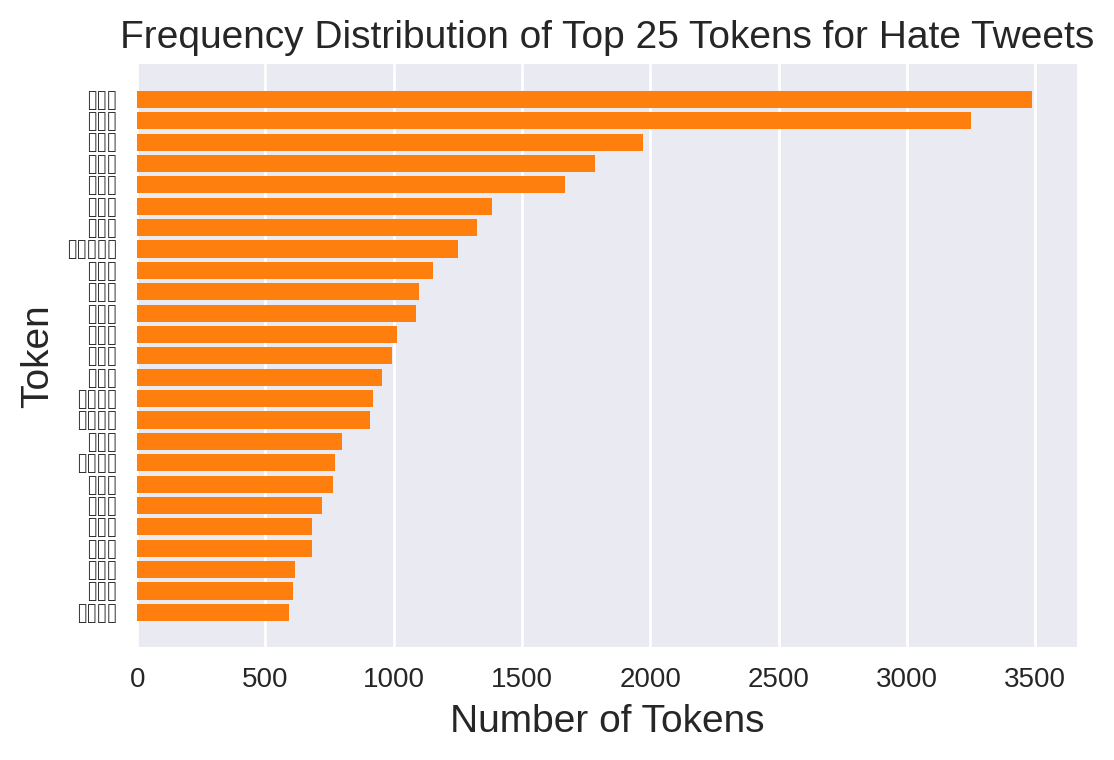

In [ ]:
# create visualization for positive class
vec_one = CountVectorizer()
docs_one = vec_one.fit_transform(one_tokens)
features_one = vec_one.get_feature_names_out()

visualizer_one = FreqDistVisualizer(features=features_one, orient='h', n=25, size=(540, 360), color='tab:orange')
visualizer_one.fit(docs_one)
custom_viz_one = visualizer_one.ax
custom_viz_one.set_xlabel('Number of Tokens', fontsize=14)
custom_viz_one.set_ylabel('Token', fontsize=14)
custom_viz_one.set_title("Frequency Distribution of Top 25 Tokens for Hate Tweets", fontsize=14)
custom_viz_one.figure.show()

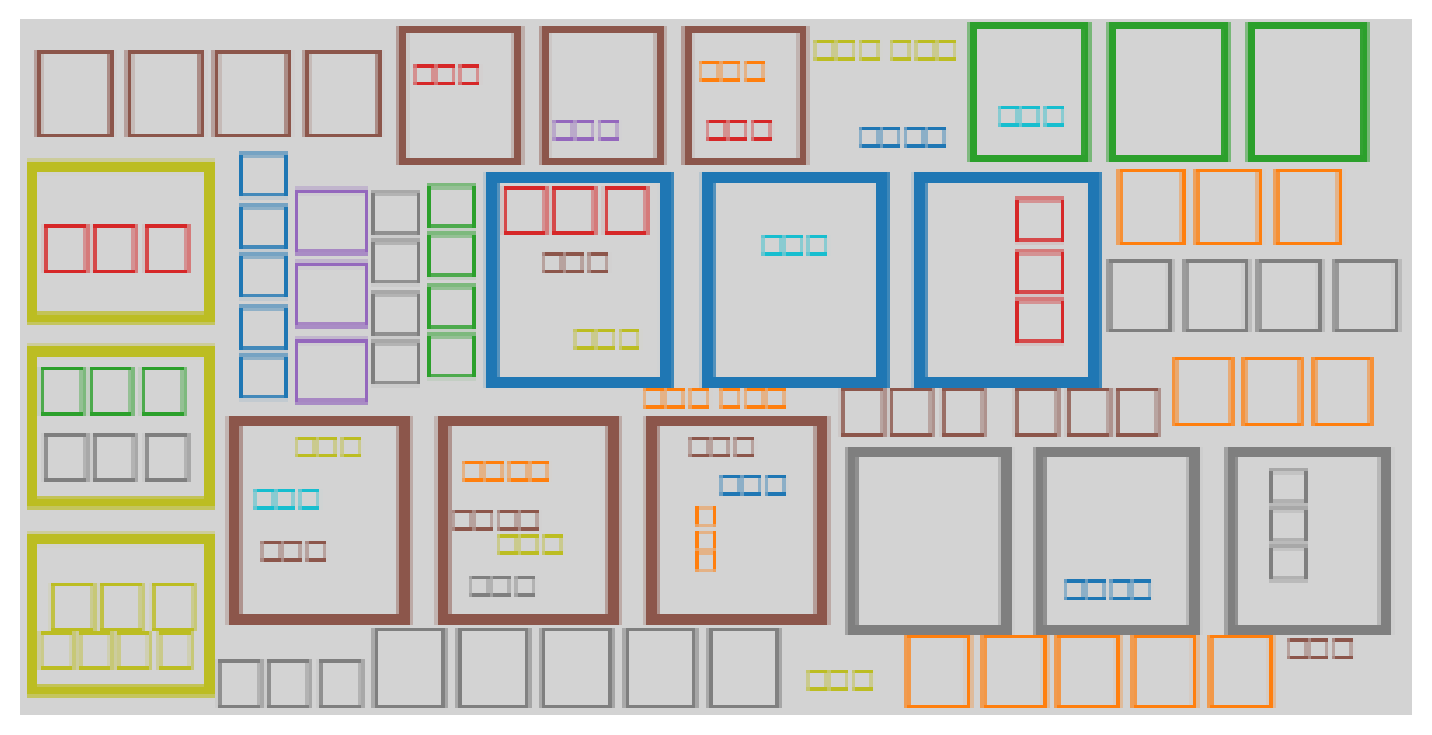

In [ ]:
text = ' '.join(zero_tokens)
font_path = '/content/drive/MyDrive/Colab Notebooks/Kruti-Dev-012.ttf'

# Initialize wordcloud object
wc = WordCloud( background_color='lightgray', colormap='tab10', font_path=font_path, max_words=50)

# Generate and plot wordcloud
plt.imshow(wc.generate(text))
plt.axis('off')
plt.show()

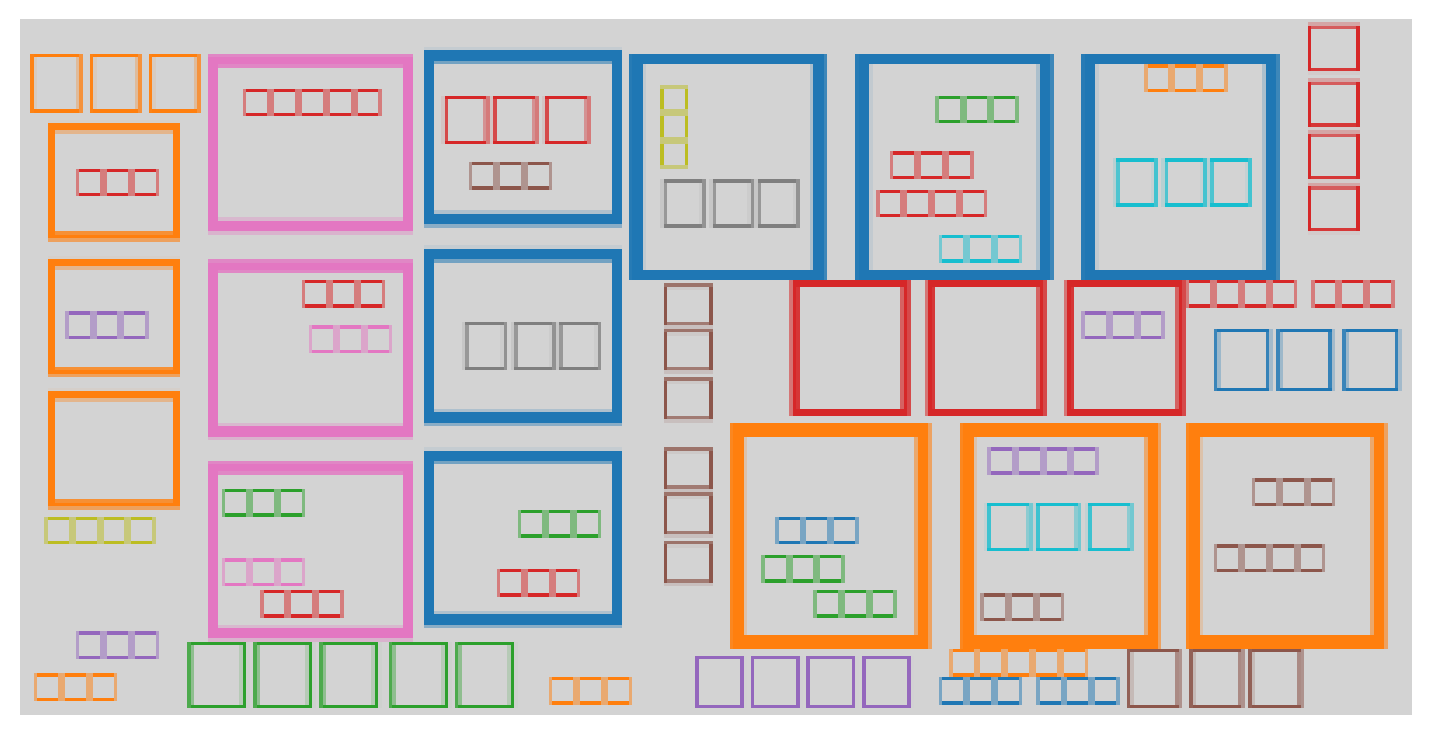

In [ ]:
text = ' '.join(one_tokens)
font_path = '/content/drive/MyDrive/Colab Notebooks/Kruti-Dev-012.ttf'
# Initialize wordcloud object
wc = WordCloud( background_color='lightgray', colormap='tab10', font_path=font_path, max_words=50)

# Generate and plot wordcloud
plt.imshow(wc.generate(text))
plt.axis('off')
plt.show()

In [ ]:
train.text1

0        'कतय', 'शबद', 'नफरत', 'कयक', 'महलओ', 'बहत', 'अचछ'
1                                          'चगचग', 'बदसरत'
2        'कमबखत', 'शटग', 'कतर', 'करन', 'चहत', 'बहत', 'नरज'
3                                            'ववहत', 'सअर'
4                                     'महलए', 'सबस', 'वषल'
                               ...                        
29837                                         'ववह', 'कवल'
29838    'वसतव', 'समय', 'लगत', 'करत', 'करत', 'सकस', 'कर...
29839             'अपन', 'सबस', 'अचछ', 'दसत', 'चदई', 'सकत'
29840    'पलस', 'वरषय', 'घसटबसटरस', 'अभनत', 'सटरट', 'सट...
29841    'बरहड', 'आदम', 'बनन', 'पसद', 'धनयवद', 'भगवन', ...
Name: text1, Length: 29842, dtype: object

In [ ]:
def combination_of_words(df):
    return TextBlob(" ".join(train.text.sum())).ngrams(2)

In [ ]:
combination_of_words(zero)[:50]

[WordList(['कतय', 'शबद']),
 WordList(['शबद', 'नफरत']),
 WordList(['नफरत', 'कयक']),
 WordList(['कयक', 'महलओ']),
 WordList(['महलओ', 'बहत']),
 WordList(['बहत', 'अचछ']),
 WordList(['अचछ', 'चगचग']),
 WordList(['चगचग', 'बदसरत']),
 WordList(['बदसरत', 'कमबखत']),
 WordList(['कमबखत', 'शटग']),
 WordList(['शटग', 'कतर']),
 WordList(['कतर', 'करन']),
 WordList(['करन', 'चहत']),
 WordList(['चहत', 'बहत']),
 WordList(['बहत', 'नरज']),
 WordList(['नरज', 'ववहत']),
 WordList(['ववहत', 'सअर']),
 WordList(['सअर', 'महलए']),
 WordList(['महलए', 'सबस']),
 WordList(['सबस', 'वषल']),
 WordList(['वषल', 'आपरवस']),
 WordList(['आपरवस', 'रहन']),
 WordList(['रहन', 'सरकषत']),
 WordList(['सरकषत', 'महसस']),
 WordList(['महसस', 'करत']),
 WordList(['करत', 'हदओ']),
 WordList(['हदओ', 'हमर']),
 WordList(['हमर', 'रसत']),
 WordList(['रसत', 'मलग']),
 WordList(['मलग', 'अवध']),
 WordList(['अवध', 'एलयस']),
 WordList(['एलयस', 'अगल']),
 WordList(['अगल', 'दरवज']),
 WordList(['दरवज', 'रहन']),
 WordList(['रहन', 'चहत']),
 WordList(['चहत', 'वफरस

In [ ]:
combination_of_words(one)[:50]

[WordList(['कतय', 'शबद']),
 WordList(['शबद', 'नफरत']),
 WordList(['नफरत', 'कयक']),
 WordList(['कयक', 'महलओ']),
 WordList(['महलओ', 'बहत']),
 WordList(['बहत', 'अचछ']),
 WordList(['अचछ', 'चगचग']),
 WordList(['चगचग', 'बदसरत']),
 WordList(['बदसरत', 'कमबखत']),
 WordList(['कमबखत', 'शटग']),
 WordList(['शटग', 'कतर']),
 WordList(['कतर', 'करन']),
 WordList(['करन', 'चहत']),
 WordList(['चहत', 'बहत']),
 WordList(['बहत', 'नरज']),
 WordList(['नरज', 'ववहत']),
 WordList(['ववहत', 'सअर']),
 WordList(['सअर', 'महलए']),
 WordList(['महलए', 'सबस']),
 WordList(['सबस', 'वषल']),
 WordList(['वषल', 'आपरवस']),
 WordList(['आपरवस', 'रहन']),
 WordList(['रहन', 'सरकषत']),
 WordList(['सरकषत', 'महसस']),
 WordList(['महसस', 'करत']),
 WordList(['करत', 'हदओ']),
 WordList(['हदओ', 'हमर']),
 WordList(['हमर', 'रसत']),
 WordList(['रसत', 'मलग']),
 WordList(['मलग', 'अवध']),
 WordList(['अवध', 'एलयस']),
 WordList(['एलयस', 'अगल']),
 WordList(['अगल', 'दरवज']),
 WordList(['दरवज', 'रहन']),
 WordList(['रहन', 'चहत']),
 WordList(['चहत', 'वफरस

In [ ]:
def term_frequency(df):
    tf1 = (df['text1'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index())
    tf1.columns = ['words', 'tf']
    tf1 = tf1.sort_values(by='tf', ascending=False).reset_index()
    return tf1

In [ ]:
tf1 = term_frequency(zero)

In [ ]:
tf1.head(10)

,index,words,tf
0,12,"'करन',",3268.0
1,38,"'करत',",2517.0
2,92,"'अपन',",1911.0
3,5,"'बहत',",1694.0
4,24,'करत',1502.0
5,65,"'आपक',",1358.0
6,135,"'लकन',",1310.0
7,182,"'तरह',",1251.0
8,162,"'उनह',",1244.0
9,88,"'सकत',",1188.0


In [ ]:
tf2 = term_frequency(one)

In [ ]:
tf2.head(10)

,index,words,tf
0,37,"'करन',",2868.0
1,78,"'करत',",2344.0
2,21,"'अपन',",1951.0
3,2,"'बहत',",1651.0
4,12,"'आपक',",1310.0
5,20,'करत',1144.0
6,94,"'लकन',",1135.0
7,112,"'सकत',",1070.0
8,19,"'कमबखत',",1037.0
9,17,"'तरह',",1010.0


In [ ]:
train.head()

,text,target,text1
0,"[कतय, शबद, नफरत, कयक, महलओ, बहत, अचछ]",0,"'कतय', 'शबद', 'नफरत', 'कयक', 'महलओ', 'बहत', 'अचछ'"
1,"[चगचग, बदसरत]",0,"'चगचग', 'बदसरत'"
2,"[कमबखत, शटग, कतर, करन, चहत, बहत, नरज]",0,"'कमबखत', 'शटग', 'कतर', 'करन', 'चहत', 'बहत', 'नरज'"
3,"[ववहत, सअर]",0,"'ववहत', 'सअर'"
4,"[महलए, सबस, वषल]",0,"'महलए', 'सबस', 'वषल'"


In [ ]:
val.head()

,text,target,text1
0,"[पयर, करत, नगणय, दसत]",0,"'पयर', 'करत', 'नगणय', 'दसत'"
1,"[उममद, करन]",0,"'उममद', 'करन'"
2,"[अधकश, नगर, अजञन, जनत, कमल, हरस, उनक, करग]",0,"'अधकश', 'नगर', 'अजञन', 'जनत', 'कमल', 'हरस', 'उ..."
3,"[गसस, लडकय, पयर, नरज, सकस]",0,"'गसस', 'लडकय', 'पयर', 'नरज', 'सकस'"
4,"[डइक, सवदनहन, घणत, परष, नफरत, करत, चहत, दनय, अ...",0,"'डइक', 'सवदनहन', 'घणत', 'परष', 'नफरत', 'करत', ..."


In [ ]:
# TfidfVectorizer
X_tr = train.text1
X_val = val.text1
y_tr = train.target
y_val = val.target
vec = TfidfVectorizer()
tfidf_tr = vec.fit_transform(X_tr)
tfidf_val = vec.transform(X_val)

In [ ]:
from sklearn.svm import SVC

#X_train, X_test, y_train, y_test = train_test_split(tfidf_tr, y_tr, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    #'Multinomial Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
}

# Create an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Balanced Accuracy'])

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(tfidf_tr, y_tr)

    # Make predictions
    predictions = model.predict(tfidf_val)

    # Evaluate performance metrics
    accuracy = accuracy_score(y_val, predictions)
    precision = precision_score(y_val, predictions)
    recall = recall_score(y_val, predictions)
    f1 = f1_score(y_val, predictions)
    roc_auc = roc_auc_score(y_val, model.predict_proba(tfidf_val)[:, 1])
    balanced_acc = balanced_accuracy_score(y_val, predictions)

    # Append metrics to the DataFrame
    metrics_df = metrics_df.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Balanced Accuracy': balanced_acc
    }, ignore_index=True)

# Display the metrics DataFrame
print(metrics_df)



                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
0  Logistic Regression  0.674933   0.654943  0.613246  0.633409  0.740669   
1        Random Forest  0.652312   0.636515  0.561288  0.596539  0.723854   
2             AdaBoost  0.601542   0.547145  0.753750  0.634041  0.652345   
3    Gradient Boosting  0.616790   0.714836  0.271497  0.393530  0.691418   
4                  SVM  0.659350   0.640112  0.585071  0.611355  0.735089   

   Balanced Accuracy  
0           0.670147  
1           0.645250  
2           0.613351  
3           0.589999  
4           0.653587  


In [ ]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Tokenize your text data
tokenized_sentences = [sentence.split() for sentence in X_tr]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Convert each document to the average of its word vectors
word2vec_tr = np.array([np.mean([word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for sentence in tokenized_sentences])

# Tokenize and convert validation data
tokenized_val = [sentence.split() for sentence in X_val]
word2vec_val = np.array([np.mean([word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for sentence in tokenized_val])

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    #'Multinomial Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
}

# Create an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Balanced Accuracy'])

# Train and evaluate each model
for name, model in models.items():
    # Train the model on Word2Vec vectors
    model.fit(word2vec_tr, y_tr)

    # Make predictions on the validation dataset
    predictions = model.predict(word2vec_val)

    # Evaluate performance metrics
    accuracy = accuracy_score(y_val, predictions)
    precision = precision_score(y_val, predictions)
    recall = recall_score(y_val, predictions)
    f1 = f1_score(y_val, predictions)
    roc_auc = roc_auc_score(y_val, model.predict_proba(word2vec_val)[:, 1])
    balanced_acc = balanced_accuracy_score(y_val, predictions)

    # Append metrics to the DataFrame
    metrics_df = metrics_df.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Balanced Accuracy': balanced_acc
    }, ignore_index=True)

# Display the metrics DataFrame
print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
0  Logistic Regression  0.592493   0.584314  0.381632  0.461709  0.619886   
1        Random Forest  0.625168   0.609444  0.505306  0.552511  0.683475   
2             AdaBoost  0.585958   0.574179  0.371021  0.450767  0.616817   
3    Gradient Boosting  0.605395   0.613174  0.374680  0.465137  0.654450   
4                  SVM  0.590483   0.624676  0.264910  0.372045  0.633810   

   Balanced Accuracy  
0           0.576133  
1           0.615868  
2           0.569282  
3           0.587494  
4           0.565222  


In [ ]:
from sklearn.model_selection import KFold


In [ ]:
!pip install transformers
!pip install torch
!pip install fast-bert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 95.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.8 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl siz

In [ ]:
!pip install fast-bert

In [ ]:
from fast_bert.data_lm import BertLMDataBunch
# Language model learner
from fast_bert.learner_lm import BertLMLearner

from pathlib import Path
from box import Box

In [ ]:
dataf= pd.DataFrame(train)
dataf.to_csv('train.csv', index=False)

In [ ]:
dataf= pd.DataFrame(val)
dataf.to_csv('val.csv', index=False)

In [ ]:
labels=df.target
dataf= pd.DataFrame(labels)
dataf.to_csv('label.csv', index=False)

In [ ]:
import torch
import torch.nn as nn
import transformers
from transformers import AutoModel, BertTokenizerFast

device = torch.device("cuda")

In [ ]:
# check class distribution
df2

,label,text,word_ct,char_ct,avg_wrd,hash_ct,retexts,callouts,charref,hashtags,links
0,0,यह एक पत क लए अपन पतन क बलतकर करन कनन हन चहए,13,62,3.846154,0,,,,,
1,0,दलत ललइफ मल ह,4,19,4.000000,0,,,,,
2,0,दलत कम ह,3,11,3.000000,0,,,,,
3,0,यह एक बहतर दनय थ जब महलओ न परष स सवल नह करन क ...,16,74,3.687500,0,,,,,
4,0,म यह कड महनत नह करत तक व अपरवस सभ लभ उठ सक,13,61,3.769231,0,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
40618,0,हम यह स सभ वदशय क जबरन हट दन चहए,10,49,4.000000,0,,,,,
40619,0,हम यह स सभ परवसय क जबरन हट दन चहए,10,50,4.100000,0,,,,,
40620,0,दलत दवतओ क पयर क अयगय ह,7,35,4.142857,0,,,,,
40621,0,दलत बकर ह,3,14,4.000000,0,,,,,


In [ ]:
df2.label.value_counts()

0    21568
1    18222
Name: label, dtype: int64

In [ ]:
df2.columns=['target','text', 'word_ct', 'char_ct', 'avg_wrd', 'hash_ct',
       'rePosts', 'callouts', 'charref', 'hashtags', 'links']
df2

,target,text,word_ct,char_ct,avg_wrd,hash_ct,rePosts,callouts,charref,hashtags,links
0,0,यह एक पत क लए अपन पतन क बलतकर करन कनन हन चहए,13,62,3.846154,0,,,,,
1,0,दलत ललइफ मल ह,4,19,4.000000,0,,,,,
2,0,दलत कम ह,3,11,3.000000,0,,,,,
3,0,यह एक बहतर दनय थ जब महलओ न परष स सवल नह करन क ...,16,74,3.687500,0,,,,,
4,0,म यह कड महनत नह करत तक व अपरवस सभ लभ उठ सक,13,61,3.769231,0,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
40618,0,हम यह स सभ वदशय क जबरन हट दन चहए,10,49,4.000000,0,,,,,
40619,0,हम यह स सभ परवसय क जबरन हट दन चहए,10,50,4.100000,0,,,,,
40620,0,दलत दवतओ क पयर क अयगय ह,7,35,4.142857,0,,,,,
40621,0,दलत बकर ह,3,14,4.000000,0,,,,,


In [ ]:
df2['target'].value_counts(normalize = True)

0    0.542046
1    0.457954
Name: target, dtype: float64

In [ ]:
#split train dataset into train, validation and test sets
train_text, temp_text, train_labels, temp_labels = train_test_split(df2['text'], df['target'],
                                                                    random_state=2018,
                                                                    test_size=0.3,
                                                                    stratify=df['target'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=2018,
                                                                test_size=0.5,
                                                                stratify=temp_labels)

In [ ]:
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

<Axes: >

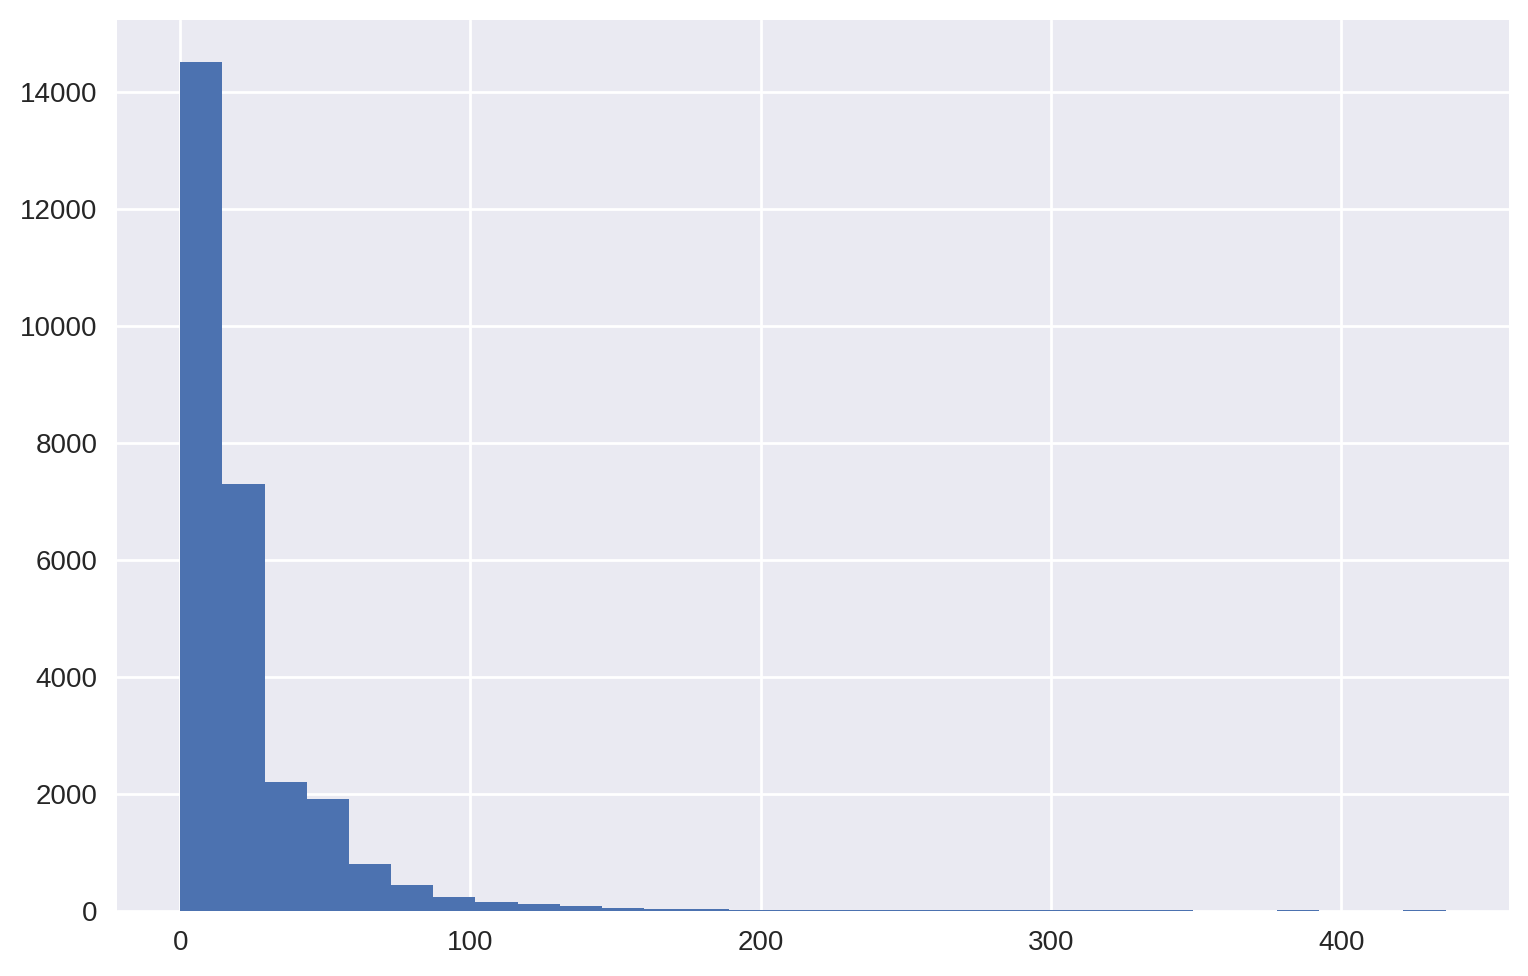

In [ ]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

In [ ]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [ ]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [ ]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch, self).__init__()

        self.bert = bert

        # dropout layer
        self.dropout = nn.Dropout(0.1)

        # relu activation function
        self.relu =  nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768,512)

        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512,2)

         #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

        #pass the inputs to the model
        _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)

        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)

        # apply softmax activation
        x = self.softmax(x)

        return x


In [ ]:
import torch

print(torch.cuda.is_available())


True


In [ ]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [ ]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),lr = 1e-5)

In [ ]:
train_labels


6164     1
16721    0
37395    0
13281    1
7389     1
        ..
1501     0
4940     1
33971    0
20918    0
38844    1
Name: target, Length: 27853, dtype: int64

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming train_labels is your array of true class labels
classes = np.unique(train_labels)

# Compute the class weights
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=train_labels)

print("Class Weights:", class_weights)



Class Weights: [0.92240694 1.09184633]


In [ ]:
# converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push to GPU
weights = weights.to(device)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights)

# number of training epochs
epochs = 10

In [ ]:
'''import torch.nn.functional as F'''


'import torch.nn.functional as F'

In [ ]:
'''class CustomWeightedCrossEntropyLoss(nn.Module):
    def __init__(self, class_weights):
        super(CustomWeightedCrossEntropyLoss, self).__init__()
        self.class_weights = class_weights

    def forward(self, input, target):
        # Calculate the raw cross-entropy loss
        ce_loss = F.cross_entropy(input, target, reduction='none')
        # Apply class weights to the loss
        weighted_loss = ce_loss * self.class_weights[target]
        return weighted_loss.mean()

# Example usage:
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
criterion = CustomWeightedCrossEntropyLoss(class_weights)
'''

"class CustomWeightedCrossEntropyLoss(nn.Module):\n    def __init__(self, class_weights):\n        super(CustomWeightedCrossEntropyLoss, self).__init__()\n        self.class_weights = class_weights\n\n    def forward(self, input, target):\n        # Calculate the raw cross-entropy loss\n        ce_loss = F.cross_entropy(input, target, reduction='none')\n        # Apply class weights to the loss\n        weighted_loss = ce_loss * self.class_weights[target]\n        return weighted_loss.mean()\n\n# Example usage:\nclass_weights = torch.tensor(class_weights, dtype=torch.float).to(device)\ncriterion = CustomWeightedCrossEntropyLoss(class_weights)\n"

In [ ]:
# function to train the model
def train():

    model.train()
    total_loss, total_accuracy = 0, 0

    # empty list to save model predictions
    total_preds=[]

    # iterate over batches
    for step,batch in enumerate(train_dataloader):

        # progress update after every 50 batches.
        if step % 100 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

        # push the batch to gpu
        batch = [r.to(device) for r in batch]

        sent_id, mask, labels = batch

        # clear previously calculated gradients
        model.zero_grad()

        # get model predictions for the current batch
        preds = model(sent_id, mask)

        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # add on to the total loss
        total_loss = total_loss + loss.item()

        # backward pass to calculate the gradients
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        # model predictions are stored on GPU. So, push it to CPU
        preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)

      # predictions are in the form of (no. of batches, size of batch, no. of classes).
      # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    #returns the loss and predictions
    return avg_loss, total_preds

In [ ]:
# function for evaluating the model
import time

def format_time(seconds):
    """Converts seconds into a string of the form HH:MM:SS"""
    h, remainder = divmod(seconds, 3600)
    m, s = divmod(remainder, 60)
    return "{:0>2}:{:0>2}:{:0>2}".format(int(h), int(m), int(s))

def evaluate():

    print("\nEvaluating...")

    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0

    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step,batch in enumerate(val_dataloader):

        # Progress update every 50 batches.
        if step % 100 == 0 and not step == 0:

            # Calculate elapsed time in minutes.
           # elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():
             # model predictions
            preds = model(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds,labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader)

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)
    return avg_loss, total_preds

In [ ]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):

    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    #train model
    train_loss, _ = train()
    #evaluate model
    valid_loss, _ = evaluate()

    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10
  Batch   100  of    871.
  Batch   200  of    871.
  Batch   300  of    871.
  Batch   400  of    871.
  Batch   500  of    871.
  Batch   600  of    871.
  Batch   700  of    871.
  Batch   800  of    871.

Evaluating...
  Batch   100  of    187.

Training Loss: 0.694
Validation Loss: 0.694

 Epoch 2 / 10
  Batch   100  of    871.
  Batch   200  of    871.
  Batch   300  of    871.
  Batch   400  of    871.
  Batch   500  of    871.
  Batch   600  of    871.
  Batch   700  of    871.
  Batch   800  of    871.

Evaluating...
  Batch   100  of    187.

Training Loss: 0.694
Validation Loss: 0.693

 Epoch 3 / 10
  Batch   100  of    871.
  Batch   200  of    871.
  Batch   300  of    871.
  Batch   400  of    871.
  Batch   500  of    871.
  Batch   600  of    871.
  Batch   700  of    871.
  Batch   800  of    871.

Evaluating...
  Batch   100  of    187.

Training Loss: 0.694
Validation Loss: 0.693

 Epoch 4 / 10
  Batch   100  of    871.
  Batch   200  of    871.
  Batc

In [ ]:
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device))
    preds = preds.detach().cpu().numpy()

In [ ]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.60      0.03      0.06      3235
           1       0.46      0.98      0.63      2734

    accuracy                           0.46      5969
   macro avg       0.53      0.50      0.34      5969
weighted avg       0.54      0.46      0.32      5969

